In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('health_data.csv')
data.tail(50)

,age,restbps,chol,category
650,45,130,214,1
651,48,131,226,1
652,51,135,268,1
653,39,119,247,1
654,34,135,238,1
655,54,135,254,1
656,53,143,189,1
657,40,136,234,1
658,45,150,149,1
659,51,109,242,1


In [5]:
#first, lets try a bayes classifier with the class conditional densities assumed to be Gaussian. There are two categories, 0 and 1.
X = data.to_numpy()[:, :3]
Y = data.to_numpy()[:, 3]
X_0 = data[data['category'] == 0].to_numpy()[:, :3]
X_1 = data[data['category'] == 1].to_numpy()[:, :3]

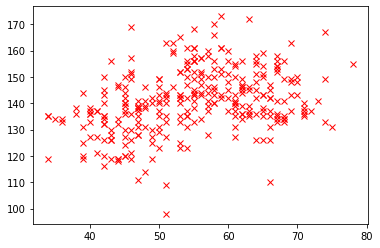

In [23]:
plt.plot(X_1[:,0], X_1[:,1], 'rx') #rbps vs age
#plt.plot(X_0[:, 0], X_0[:,2], 'b.') #chol vs age
#clearly they are not independent features

In [20]:
#estimating mean, variance for class 0
#maximum likelihood estimate
u0 = np.mean(X_0, axis=0) 
s0 = (X_0 - u0).T @ (X_0 - u0)/X_0.shape[0]
s0 = np.linalg.inv(s0)
#for class 1
u1 = np.mean(X_1, axis = 0)
s1 = (X_1 - u1).T @ (X_1 - u1)/X_1.shape[0]
s1 = np.linalg.inv(s0) #inverse of cov matrix

In [30]:
#decision boundary
p0 = X_0.shape[0]; p1 = X_1.shape[0]
p0 = p0/(p0 + p1); p1 = 1 - p0;
#priors chosen on basis of frequency of occurence in training data.
p = np.log(p0/p1)
s = -0.5*np.log(np.linalg.det(s1)/np.linalg.det(s0))
def g1(x):
    y = p + s -0.5*((x - u0) @ s0 @ (x-u0).T - (x - u1) @ s1 @ (x - u1))
    if (y > 0): 
        return 0
    else:return 1

In [31]:
#computing accuracy.
C = np.zeros((2,2)) #[[]]
for i in range((X.shape[0])):
    y_pred = g1(X[i])
    C[y_pred, Y[i]] += 1
        

In [32]:
acc = (C[0,0] + C[1,1])/np.sum(C)
print(acc)
print(C)
#71.5 % accuracy obtained. (It seems gaussian distribution is not such a good assumption!)

0.5714285714285714
[[400. 300.]
 [  0.   0.]]


In [29]:
#let us iterate over different values of the priors. 
TP = []
FP = []
for p0 in np.linspace(0.01,0.99,25):
    p1 = 1 - p0
    p = np.log(p0/p1)
    C = np.zeros((2,2)) #[[]]
    for i in range((X.shape[0])):
        y_pred = g1(X[i])
        C[y_pred, Y[i]] += 1
    print(C)
    TP.append(C[1,1]/(C[1,1] + C[0,1]))
    FP.append(C[1,0]/(C[1,0] + C[0,0]))
    

[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]
[[400. 300.]
 [  0.   0.]]


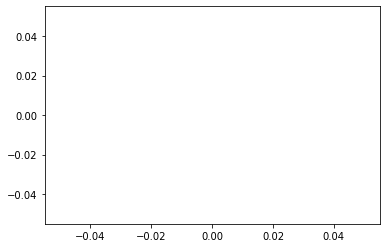

In [26]:
plt.plot(FP, TP)

In [28]:
TP

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]